# Practical Session : Mathematical Morphology and Histogram manipulations

The aim of this practical work is to get acquainted with mathematical morphology
transformations. Applying different operations with several structuring elements on
simple images will allow you understanding the actions, effects and properties of the
operations, the role of the structuring element, as well as the need for appropriate
pre-processing depending on the application at hand.

In this session, we will mainly focus on functions from the skimage.morphology package.

First, you have to download a set of images that you will use throughout the TP: https://partage.imt.fr/index.php/s/9YPTAzKsiXHQWH3

In [46]:
## imports
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
import skimage.segmentation as seg
from skimage import color
student = True

## Mathematical morphology

### The structuring element
The basic idea in mathematical orphology is to probe an image with a simple, pre-defined shape, drawing conclusions on how this shape fits or misses the shapes in the image. This simple "probe" is called the structuring element. For example, it can take the shape of a square, a disk or a diamond, with a predefined radius.

Use the function morpho.disk() of the morpho library to visualize a disk structuring element of radius 5. 

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


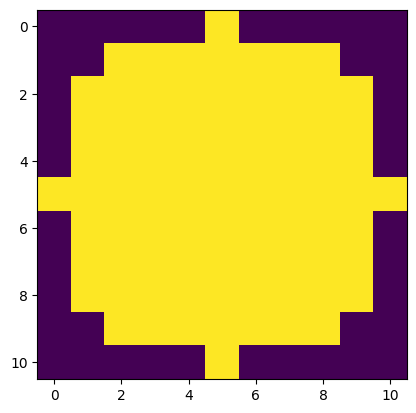

In [3]:
if student :
  strell = morpho.disk(radius=5)

print(strell)
plt.imshow(strell)
plt.show()

Find a way to create a vertical line as a structuring element with parameter length l :

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


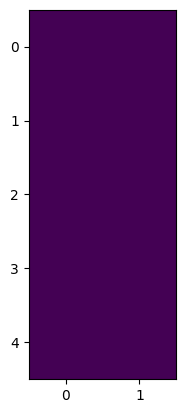

In [4]:
def line_strell(width,length):
  if student :
    strell = np.ones((length,width))
  return strell

strell = line_strell(2,5)
print(strell)
plt.imshow(strell)
plt.show()

### Binary Morphology
In this section, we will work on a cyto-image. Make sure to properly load the "cell.tif" image. Apply a thresholding of level t = 150 to that image to turn it into a binary image. Visualize the result in greyscale, by using the imshow function.

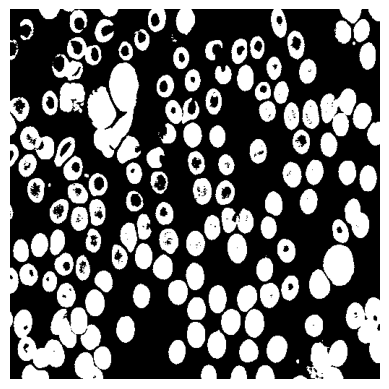

In [5]:
#load the cell image in grayscale and display it 
if student:
	img = skio.imread("images/cell.tif")#, as_gray=True)
	t=150
	imt = np.float32(img.copy())
	#we work with the white part in morphologic trnasofrmation
	mask = imt > t
	imt[mask] = 0
	imt[~mask] = 255
	plt.imshow(imt, cmap='gray')
	plt.axis('off')  # Turn off axis numbers and ticks
	plt.show()
	# Theresholding and display

We will first start by applying simple binary morphological operations on those images. You will try the following operations:
- erosion
- dilation
- opening
- closing

You will try to visualize the results by varying the structuring element and its size.  

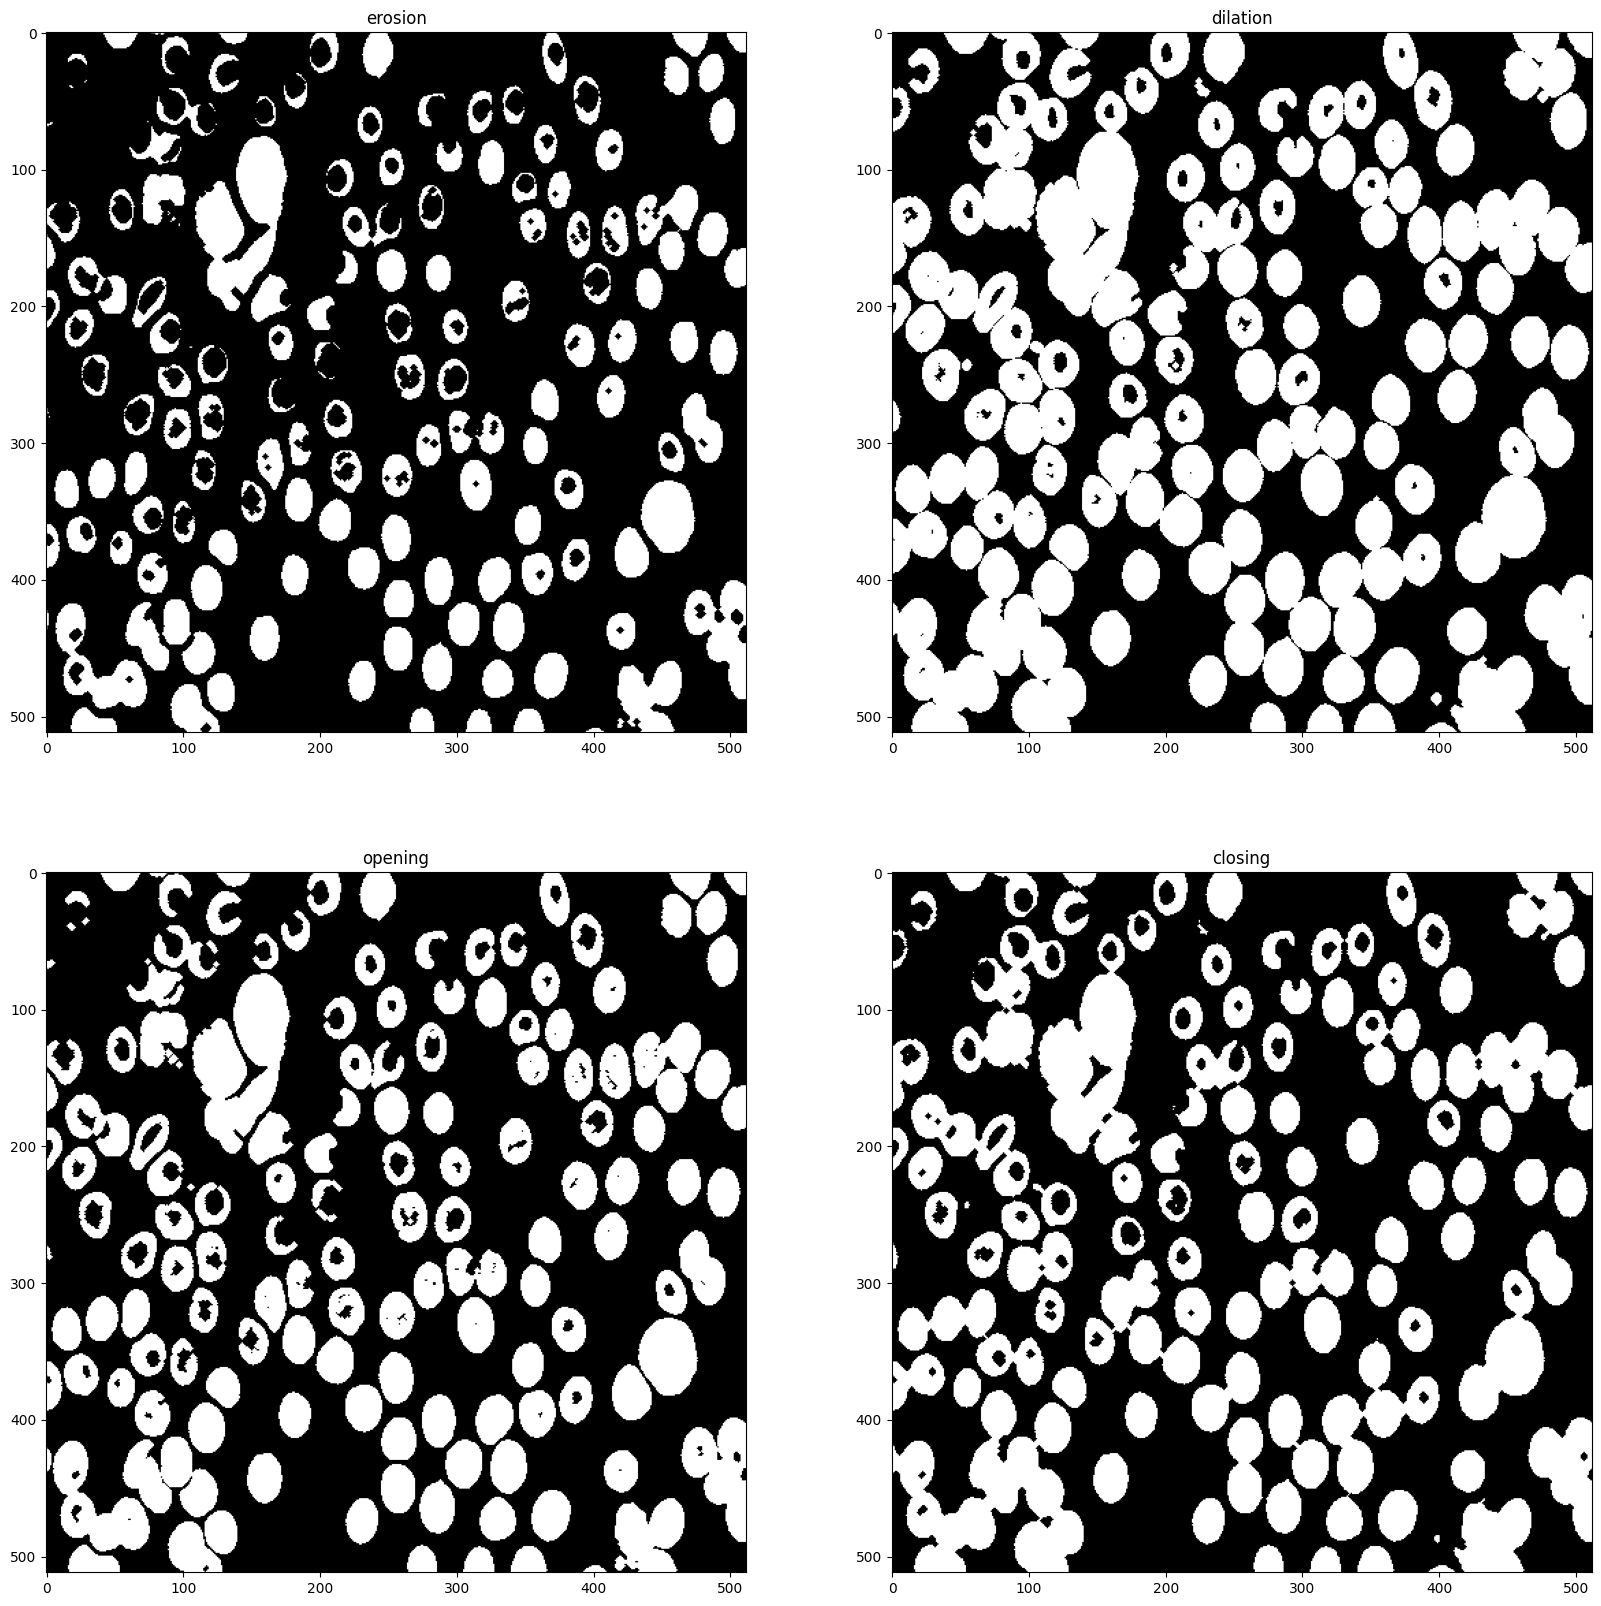

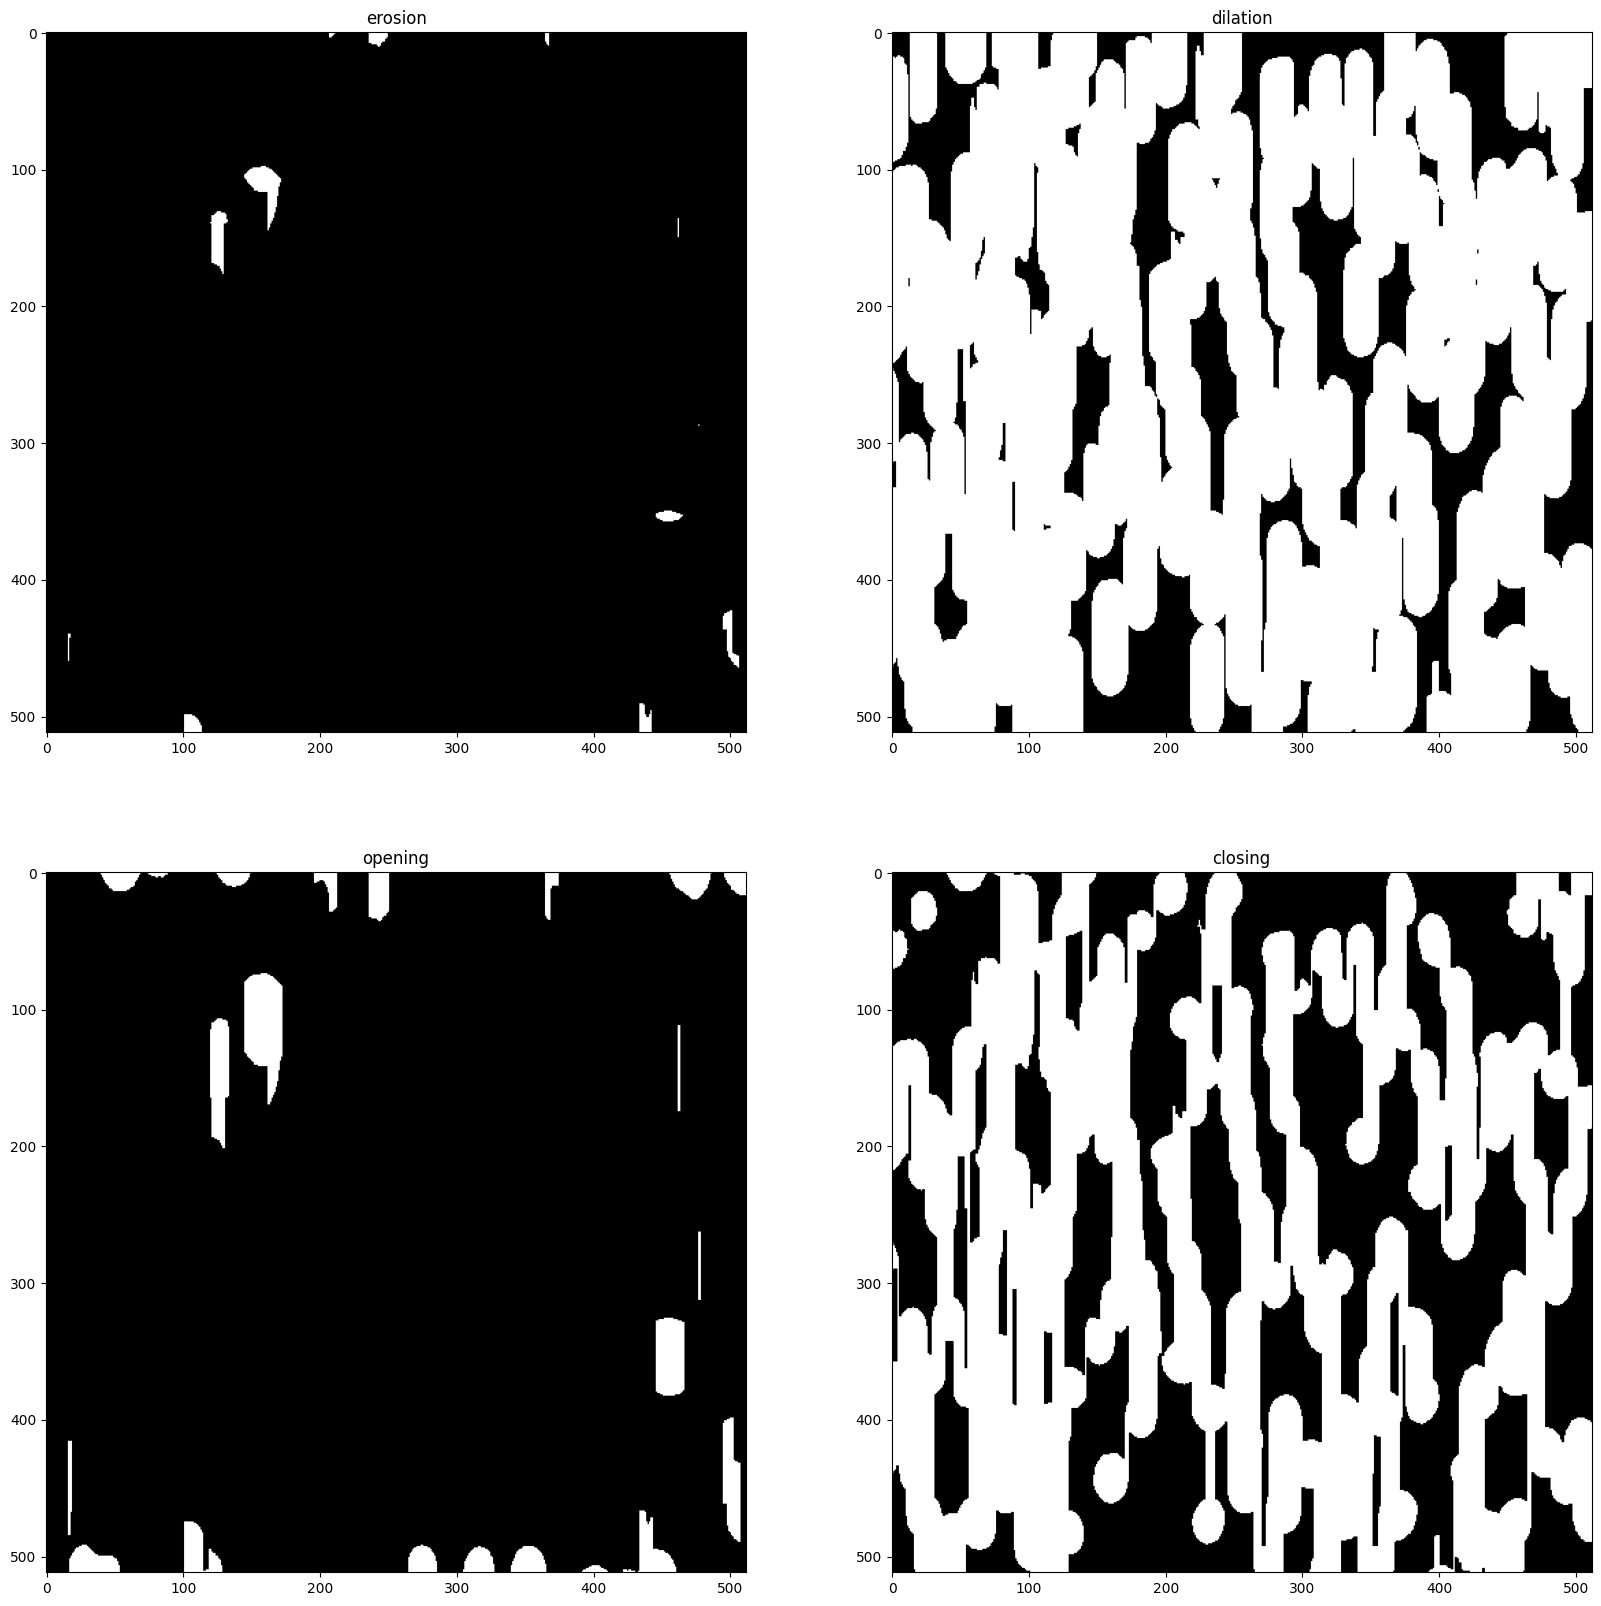

In [6]:
strell = morpho.disk(2)
fig,ax = plt.subplots(2, 2, figsize=(20,20))
erosion = morpho.erosion(imt, strell)
dilation = morpho.dilation(imt, strell)
opening = morpho.opening(imt, strell)
closing = morpho.closing(imt, strell)
imgs = [erosion,dilation,opening,closing]# Add in this list the 4 images, obtained with the for operations
names = ["erosion","dilation","opening","closing"]
for i in range(4):
  ax[i//2,i%2].set_title(names[i])
  ax[i//2,i%2].imshow(imgs[i],cmap = "gray")
#plt.show()

# try your own structuring elements and make the size vary
if student :
    strell = line_strell(2,50)
    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    erosion = morpho.erosion(imt, strell)
    dilation = morpho.dilation(imt, strell)
    opening = morpho.opening(imt, strell)
    closing = morpho.closing(imt, strell)
    imgs = [erosion,dilation,opening,closing]# Add in this list the 4 images, obtained with the for operations
    names = ["erosion","dilation","opening","closing"]
    for i in range(4):
      ax[i//2,i%2].set_title(names[i])
      ax[i//2,i%2].imshow(imgs[i],cmap = "gray")
    plt.show()


- **Q** : What is the influence of the shape of the structuring element ?
- **A** : The element will keep the elements of the original images that have a similar shape of the structuring element
- **Q** : What is the influence of the size of the structuring element ?
- **A** : Erosion: Since in erosion for a pixel in the result to be set to 1, the entire structuring element B must fit inside the object in the original image A, just the shapes that are as big as the structural element or bigger, will be keep. If the size is small is not going to there a big change in the image but the bigger the structuring element, it is probable that we're going to have less elements in the image
Opening: Since opening do first the erosion operation it follows mainly the main principle for erosion, but widening the edges of the elements that were kept after the erosion operation
Dilation: Since in dilation for a pixel in the result to be set to 1, there needs to be at least one part of the structuring element B that overlaps with the object in the original image A, the bigger the size of the element it is more probable that we're going to have more 1's in the image so that more element in the output image
Closing: Since closing do first the dilation operation it follows mainly the main principle, that's way it has more elements than opening, but the difference with the output of erotion is will change the boundaries of the elements we have after the dilation

### Greyscale Morphology
In this section, we will use the bateau.tif image. Make sure to load it and visualize it in greyscale.


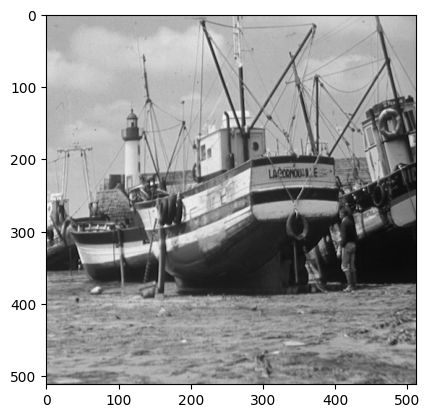

In [7]:
#load the bateau image in grayscale and display it 
if student:
  img = skio.imread("images/bateau.tif")
  plt.imshow(img, cmap = "gray")
  plt.show()

Apply the same 4 operations as before (dilation,erosion,opening,closing) and visualize the results. Try out different structuring elements and different sizes.

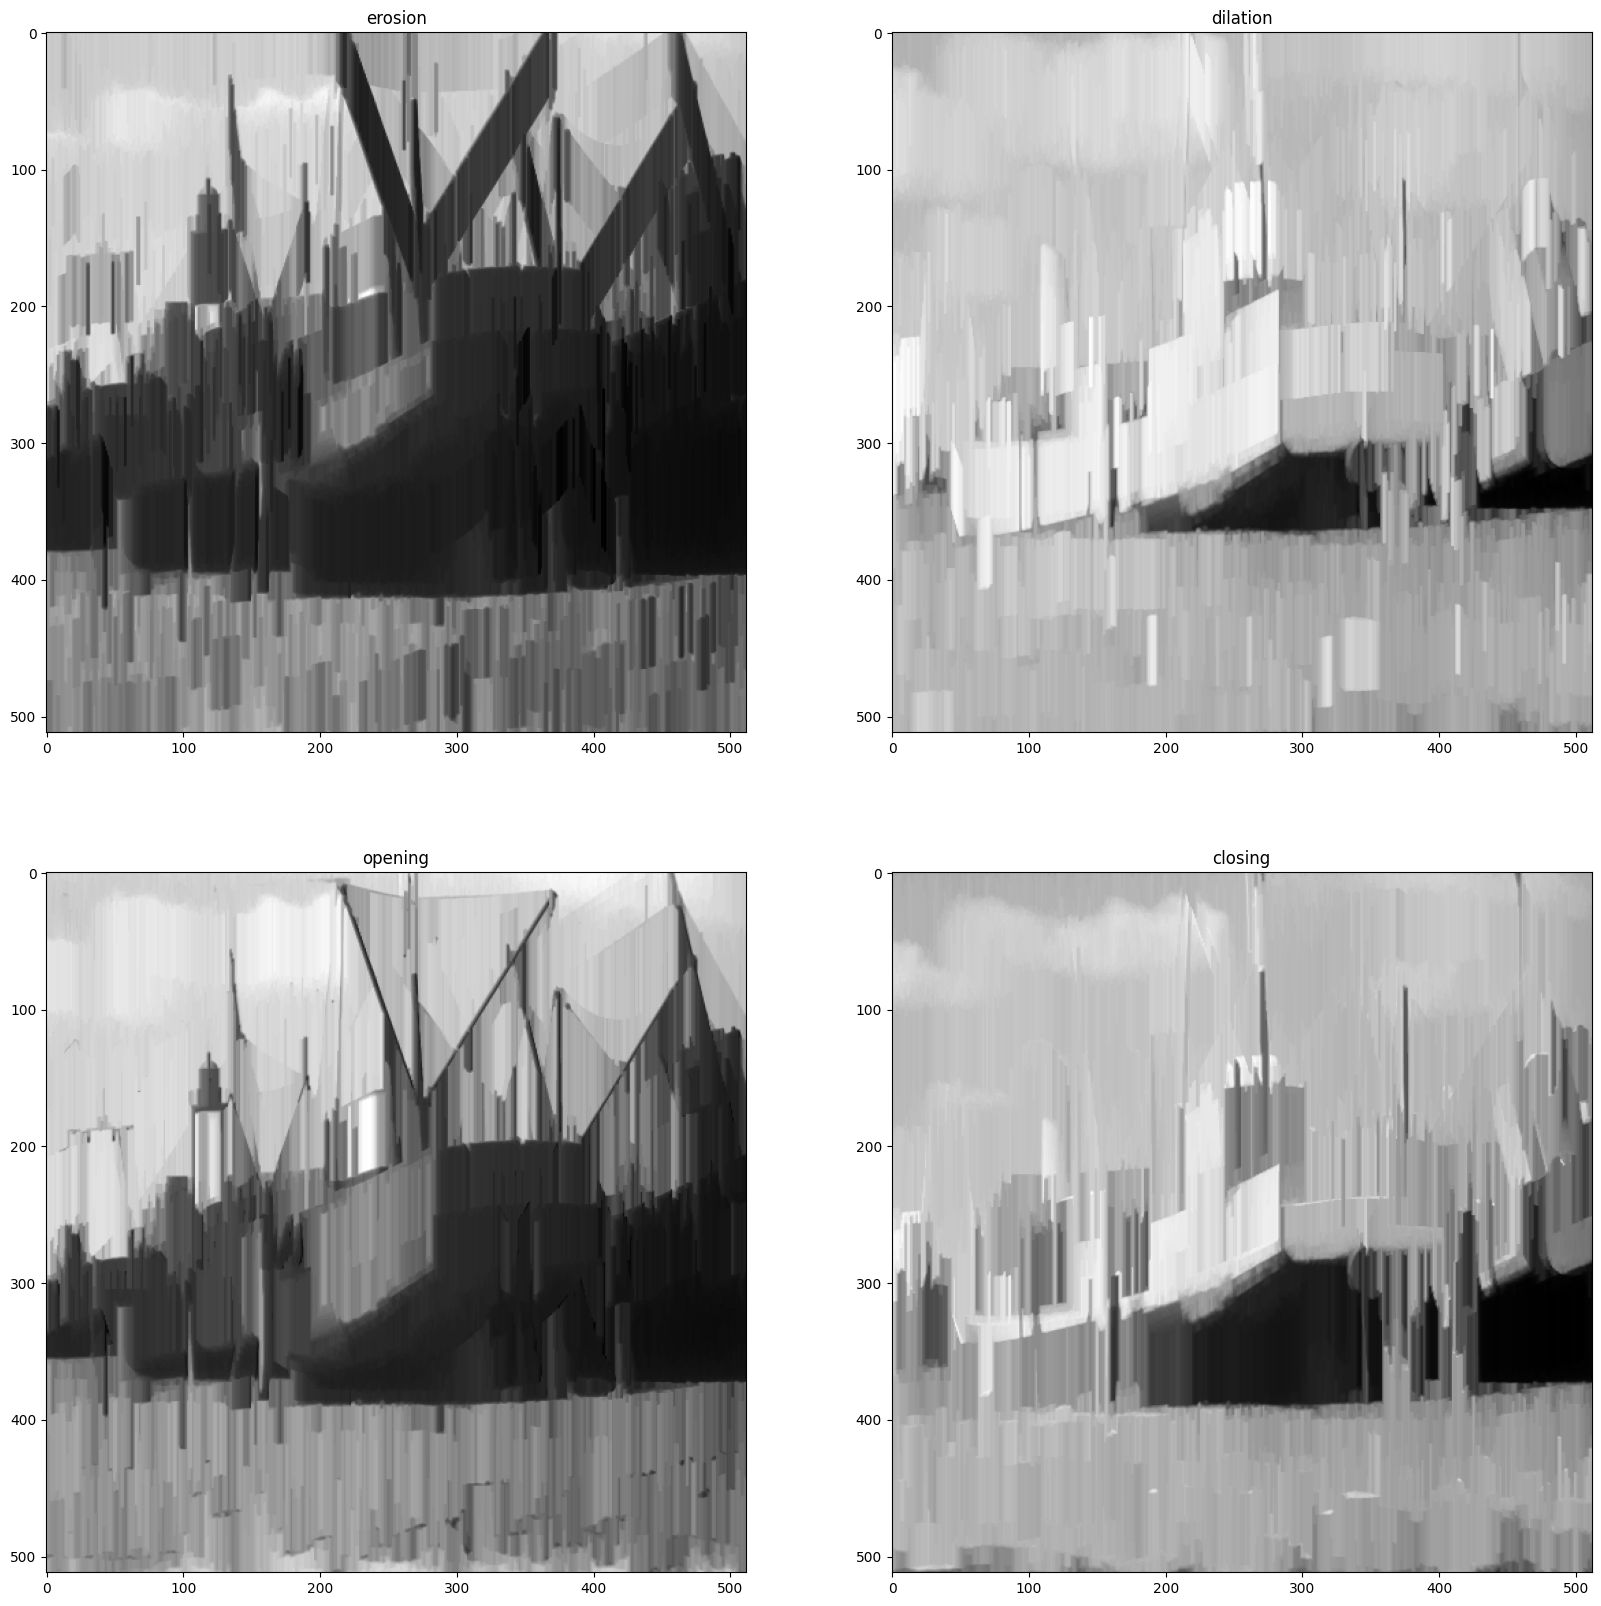

In [8]:
if student:
  ### start code
    strell = line_strell(2,50)
    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    erosion = morpho.erosion(img, strell)
    dilation = morpho.dilation(img, strell)
    opening = morpho.opening(img, strell)
    closing = morpho.closing(img, strell)
    imgs = [erosion,dilation,opening,closing]# Add in this list the 4 images, obtained with the for operations
    names = ["erosion","dilation","opening","closing"]
    for i in range(4):
      ax[i//2,i%2].set_title(names[i])
      ax[i//2,i%2].imshow(imgs[i],cmap = "gray")
    plt.show()
  ### end code

- **Q** : What is the influence of the shape and size parameters of the structuring element ?
- **A** : As said before the element will keep the elements of the original images that have a similar shape of the structuring element or modify the image so that have a ressemblence to the structural element, and the bigger the size, the bigger the elements that are similar to to the structuring element

- **Q** : We then now try to illustrate the iterativity property. What is the
result of a dilation by a disk structuring element of size 2 followed by a dilation by a
disk structuring element of size 3? Compare it with a dilation by a disk of size 5. Explain.
- **A** :There is no difference as can be see in the graphic since the disk of size 5 is the same as a dilation of disk 2 with disk 3 and the iteration property tell us that doing a dilation of image X with structuring element B followed by a dilation with structuring element B' is the same to doing a dilation of B with B' and doing a dilation of Image X with the last result

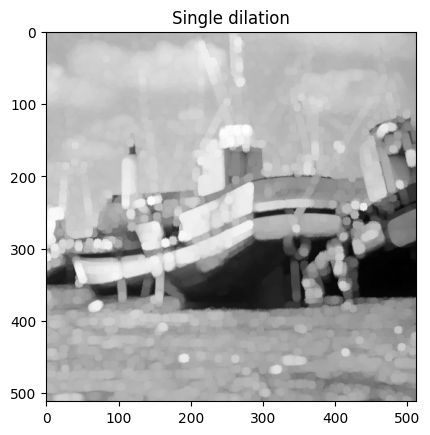

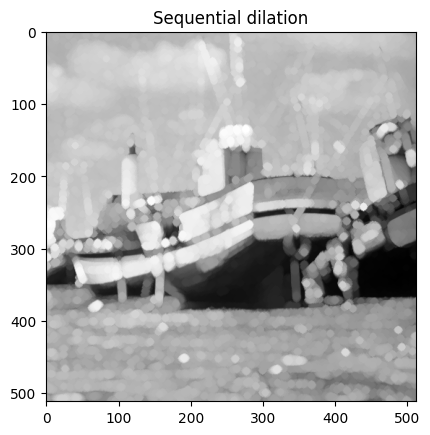

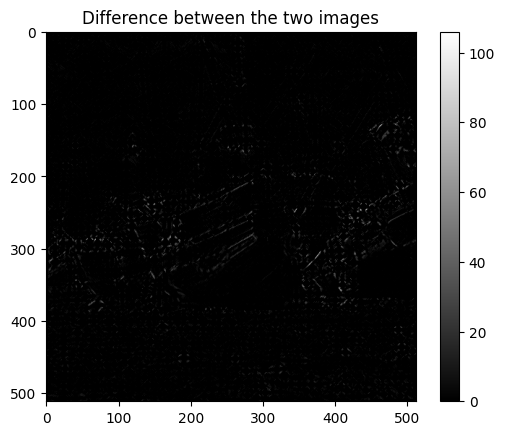

195761


In [9]:
if student:
  ### start code
  dilation = morpho.dilation(img,morpho.disk(radius=5))
  plt.imshow(dilation,cmap = "gray")
  plt.title("Single dilation")
  plt.show()

  sequential_dilation = morpho.dilation(morpho.dilation(img,morpho.disk(radius=2)),morpho.disk(radius=3))
  plt.imshow(sequential_dilation,cmap = "gray")
  plt.title("Sequential dilation")
  plt.show()

  plt.imshow(dilation-sequential_dilation,cmap = "gray")
  plt.title('Difference between the two images')
  plt.colorbar()
  plt.show()
  print(np.sum(np.abs(dilation-sequential_dilation)))

- **Q:** Plot the result of an dilation by a disk structuring element of size 2 followed by
an dilation by a disk structuring element of size 3? 
Compare with a dilation of the image by (a disk of size 2 dilated by a disk of size 3). Please note that you might have to use the np.pad function to perform this. Conclude.
- **A:** There is no difference as can be see in the graphic since the iteration property tell us that doing a dilation of image X with structuring element B followed by a dilation with structuring element B' is the same to doing a dilation of B with B' and doing a dilation of Image X with the last result

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


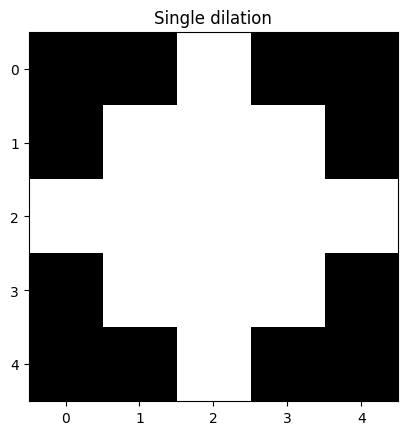

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


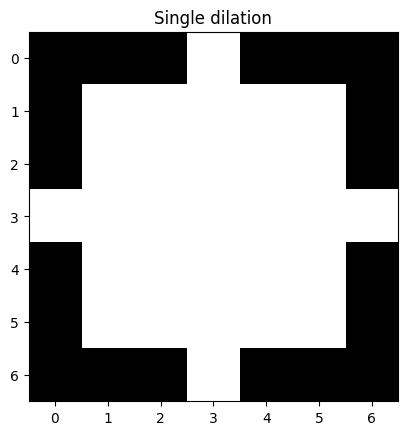

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


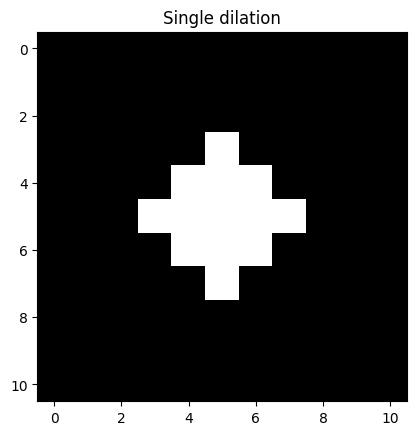

In [10]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
sqr_strell = morpho.disk(2)
print(sqr_strell)
plt.imshow(sqr_strell,cmap = "gray")
plt.title("Single dilation")
plt.show()
sqr_strell3 = morpho.disk(3)
print(sqr_strell3)
plt.imshow(sqr_strell3,cmap = "gray")
plt.title("Single dilation")
plt.show()
sqr_strell = np.pad(sqr_strell,3,pad_with)
print(sqr_strell)
plt.imshow(sqr_strell,cmap = "gray")
plt.title("Single dilation")
plt.show()
#sqr_strell = morpho.dilation(...)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


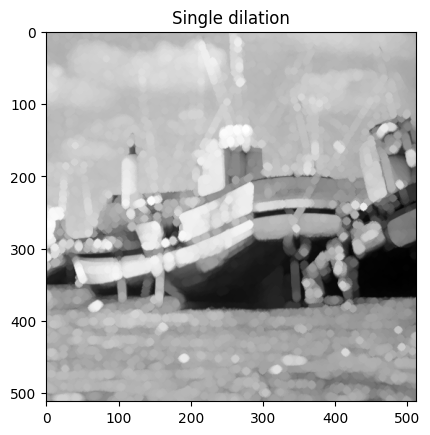

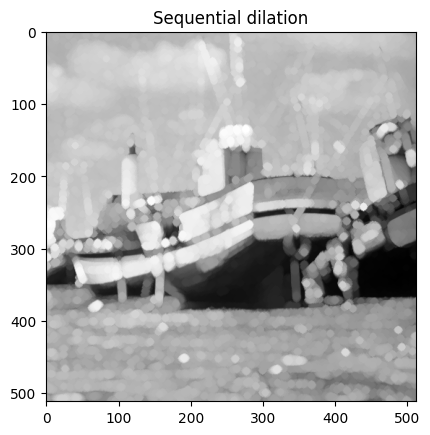

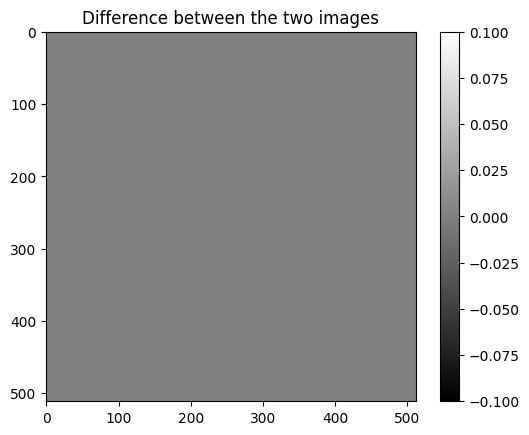

0


In [11]:
if student:
 # First create the sequential structuring element, that is a disk of size 2 dilated by a disk of size 3
  sqr_strell = morpho.disk(2)
  sqr_strell = np.pad(sqr_strell,3,pad_with)
  sqr_strell = morpho.dilation(sqr_strell, morpho.disk(3))
  print(sqr_strell)

  # Use it to perform the image dilation
  dilation = morpho.dilation(img,sqr_strell)
  plt.imshow(dilation,cmap = "gray")
  plt.title("Single dilation")
  plt.show()
  
  # Compare it with the sequential dilation
  sequential_dilation = morpho.dilation(morpho.dilation(img,morpho.disk(2)),morpho.disk(3))
  plt.imshow(sequential_dilation,cmap = "gray")
  plt.title("Sequential dilation")
  plt.show()
    
  plt.imshow(dilation-sequential_dilation,cmap = "gray")
  plt.title('Difference between the two images')
  plt.colorbar()
  plt.show()
  print(np.sum(np.abs(dilation-sequential_dilation)))

- **Q:** How can you illustrate the idempotence of closing ? Show your illustration in the following cell.
- **a:** Applying a closing to an image with a structuring element and the the result apllying closing with the same structuring element


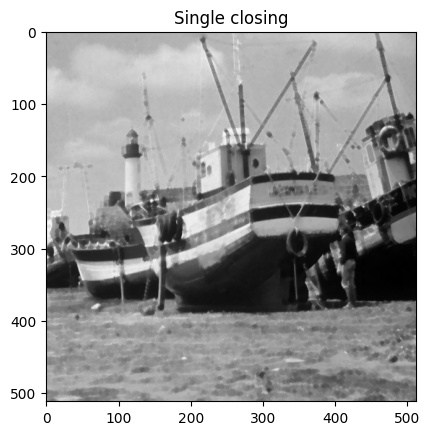

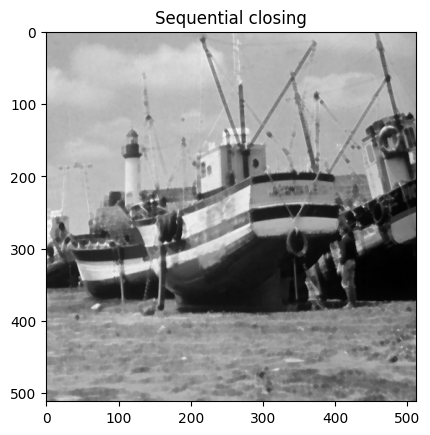

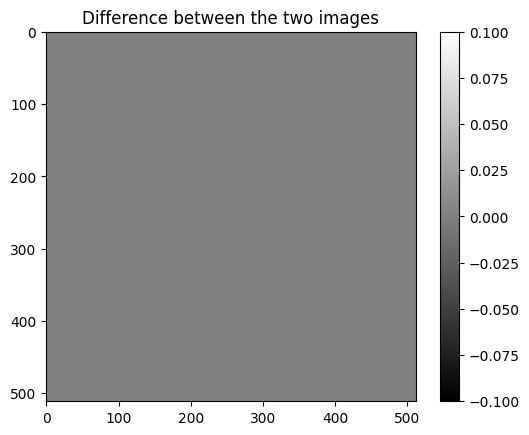

0


In [12]:
if student:
  # Use it to perform the image dilation
  closing = morpho.closing(img,morpho.disk(2))
  plt.imshow(closing,cmap = "gray")
  plt.title("Single closing")
  plt.show()
  
  # Compare it with the sequential dilation
  sequential_closing = morpho.closing(closing,morpho.disk(2))
  plt.imshow(sequential_closing,cmap = "gray")
  plt.title("Sequential closing")
  plt.show()
    
  plt.imshow(closing-sequential_closing,cmap = "gray")
  plt.title('Difference between the two images')
  plt.colorbar()
  plt.show()
  print(np.sum(np.abs(closing-sequential_closing)))

- **Q** : Perform a top-hat transform in the following cell (difference between the image and its opening).
Comment the result depending on the choice of the structuring element.
- **A** : It extracts small elements and details of the image, like contrasts for example

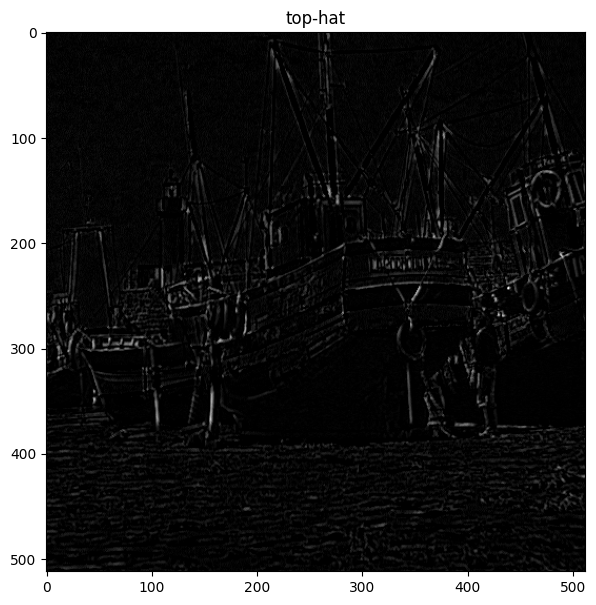

In [13]:
if student:
  ### start code
  strell = morpho.disk(2)
  top_hat = img-morpho.opening(img,strell)
plt.figure(figsize = (7,7))
plt.imshow(top_hat,cmap = "gray")
plt.title('top-hat')
plt.show()

- **Q** : Perform a dual top-hat transform in the following cell (difference between the closing and the image).
Comment the result depending on the choice of the structuring element.
- **A** : Similarly to the top hat the difference is that dual top-hat enhance dark objects of interest in a bright background

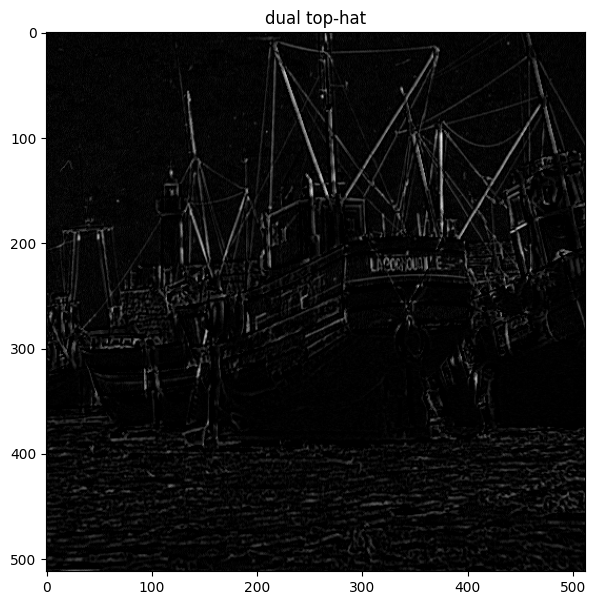

In [14]:
if student:
  ### start code
  strell = morpho.disk(2)
  dual_top_hat = morpho.closing(img,strell)-img
plt.figure(figsize = (7,7))
plt.imshow(dual_top_hat,cmap = "gray")
plt.title('dual top-hat')
plt.show()

### Alternating Filters
- **Q**: Perform alternate sequential filters, for instance by performing sequential opening and then closing by squares of radius ranging from 1 to 5. Also try out your own combinations. What kind of filtering can be expected from such
operations?
- **A**: The bigger the size of the structuring element it merges bigger objects and smooth out the details, also due to the opnening it removes medium-size details in the image

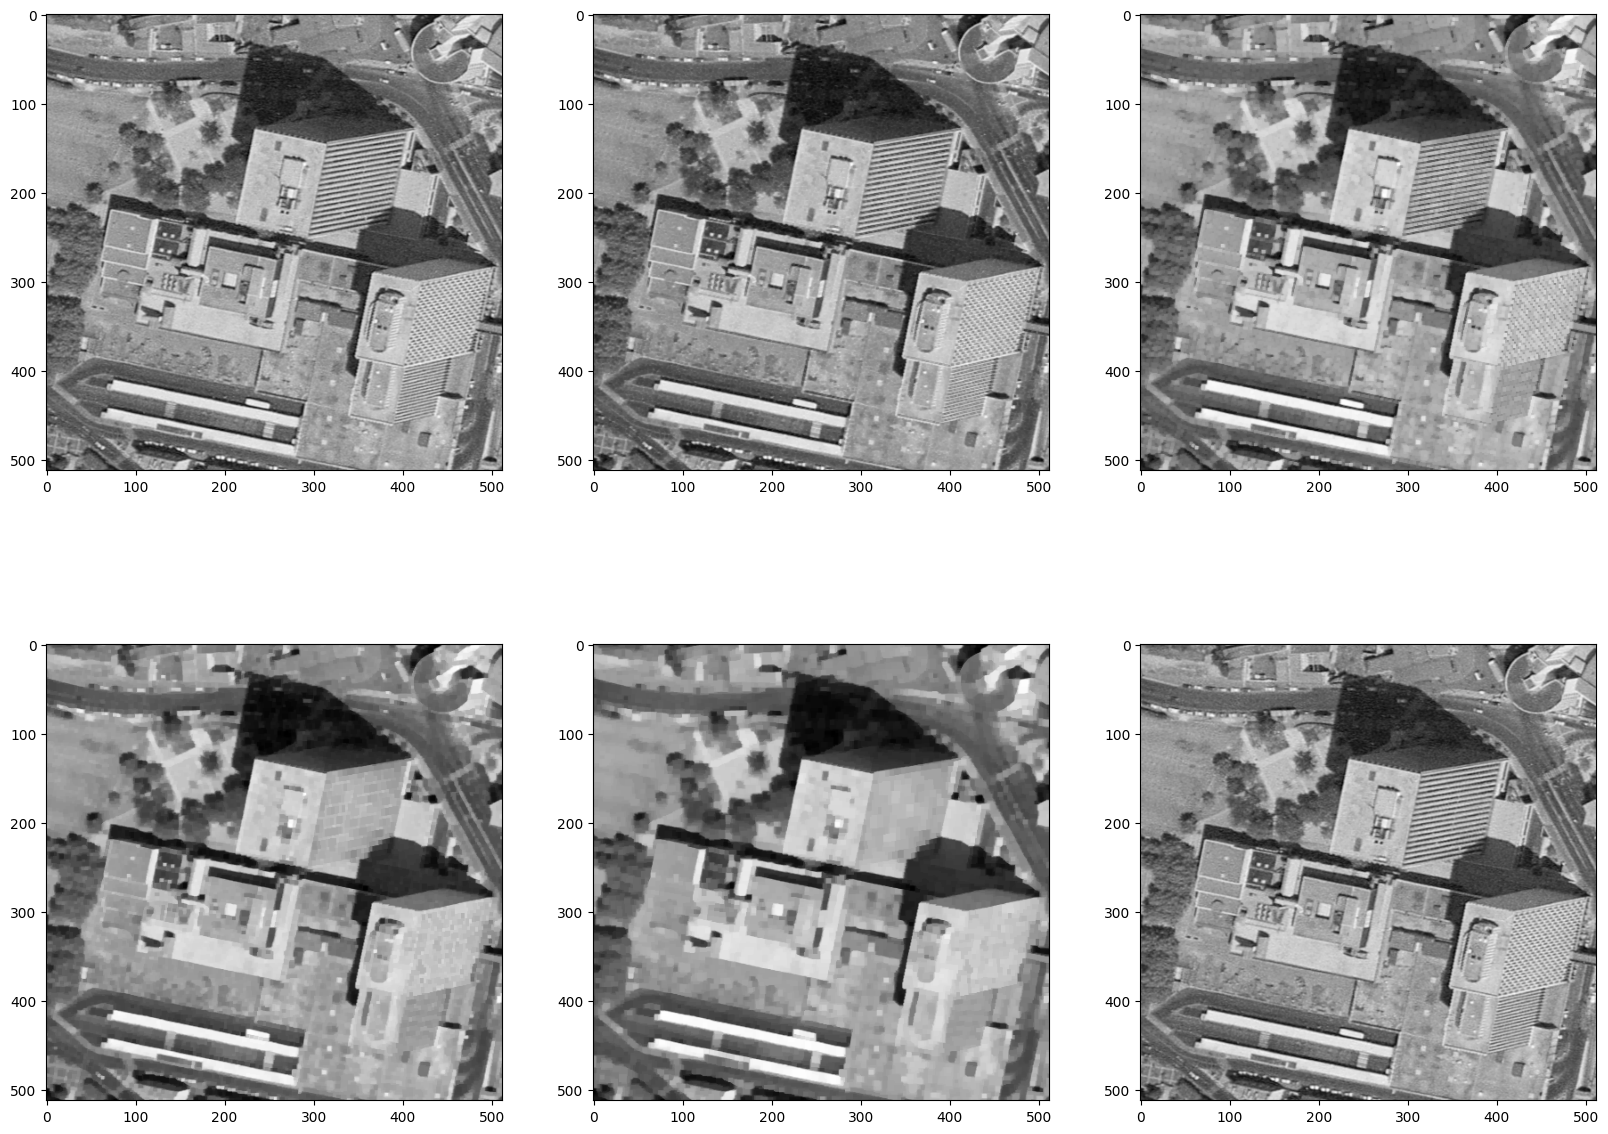

In [15]:
# Example
img = skio.imread("images/montreuil.tif")

# Structuring elements
se1=line_strell(1,1)
se2=line_strell(2,2)
se3=line_strell(3,3)
se4=line_strell(4,4)
se5=line_strell(5,5)

# Images
fas1=morpho.opening(img,se1)
fas2=morpho.closing(fas1,se2)
fas3=morpho.opening(fas2,se3)
fas4=morpho.closing(fas3,se4)
fas5=morpho.opening(fas4,se5)

fig,ax = plt.subplots(2,3,figsize = (20,15))
ax[0,0].imshow(fas1,cmap = "gray")
ax[0,1].imshow(fas2,cmap = "gray")
ax[0,2].imshow(fas3,cmap = "gray")
ax[1,0].imshow(fas4,cmap = "gray")
ax[1,1].imshow(fas5,cmap = "gray")
ax[1,2].imshow(img,cmap = "gray")
plt.show()

#Try you own
#if student :
#  ...
   

### Segmentation
 - **Q** : Apply a morphological gradient to the image cell.tif (difference between
dilation and erosion with a structuring element of radius1). What do you observe ?

- **A**: Substracitng the eroded image from the dilated image (Dilation - Erosion), we're essentially taking the difference between the expanded and contracted versions of the original image. This highlights the areas where there is a significant change in intensity, the ones with bigger change appear with a whiter color

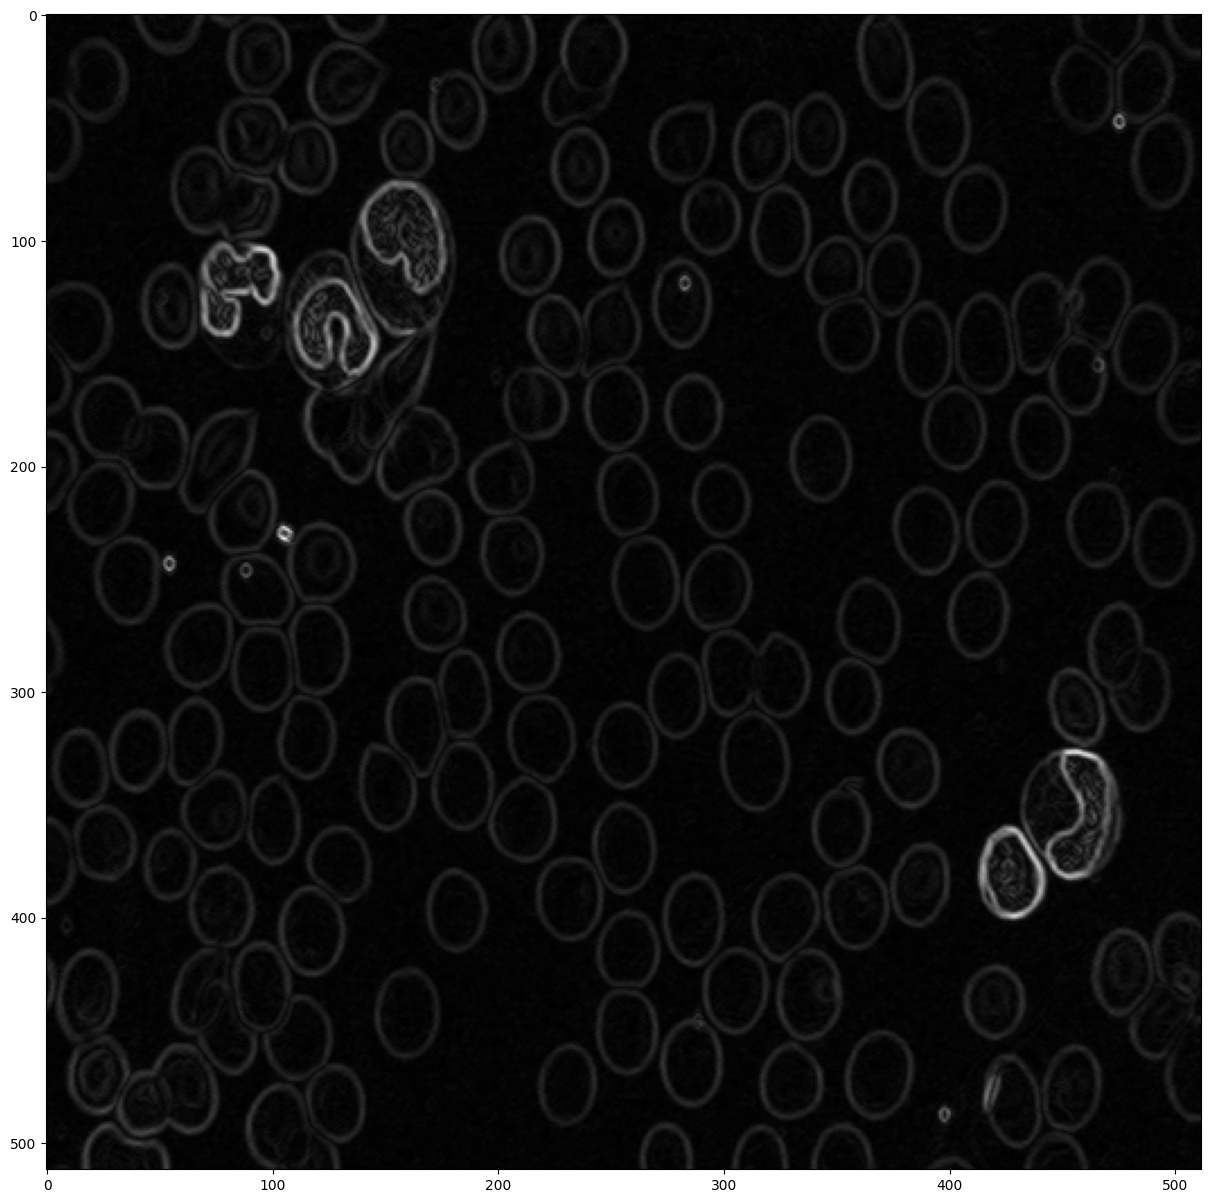

In [39]:
if student : 
  img = skio.imread("images/cell.tif")
  morpho_grad = morpho.dilation(img,morpho.disk(1)) - morpho.erosion(img,morpho.disk(1))
plt.figure(figsize=(15,15))
plt.imshow(morpho_grad,cmap = "gray")
plt.show()


- **Q** : Try to threshold the gradient with a value of 25 for instance. Why is is difficult to find an appropriate threshold value ?
- **A** : Because every image has a specific threshold that works better depending on the purpose it, so we have to test, there is no perfect threshold for all values, it depends on the noise, the intensity of the image, etc.

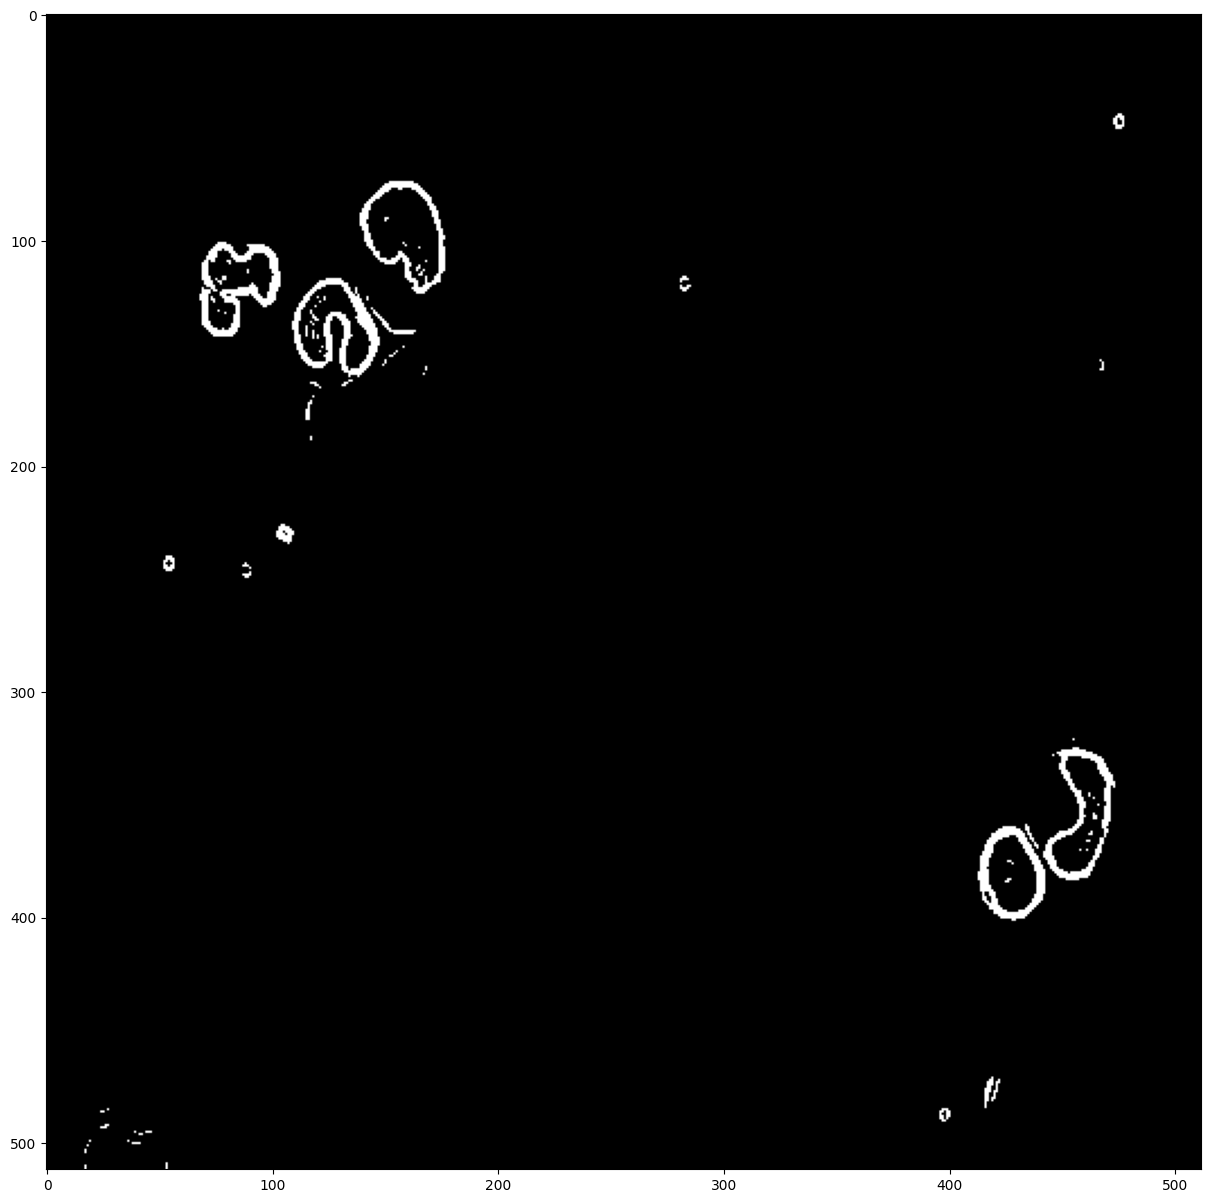

In [17]:
if student :
  thresh_grad = morpho_grad>25
plt.figure(figsize=(15,15))
plt.imshow(thresh_grad,cmap  ="gray")
plt.show()

- **Q** Apply the watershed algorithm to the gradient image using morpho.watershed(morpho_grad,k) ;
What do you observe ? 
- **A** :that it tries to segments taking into account the white areas of the gradient
- **Q** Try to change the parameter k ; what is the role of that parameter ?
- **A** :k seems to be the number of desired segments

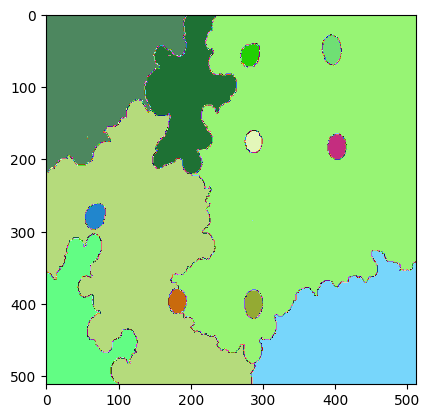

In [31]:
import matplotlib
cmaprand = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
if student :
  wat = seg.watershed(morpho_grad,20)

plt.imshow(wat, cmap =cmaprand)
plt.show()

- **Q** : Apply first a closing on the gradient image and then the watershed. Is the result better ? In which sense and why ?
- **A** : It works better because by closing small gaps, objects that were initially very close may become more distinct after the closing operation. This can lead to better separation of adjacent objects in the segmentation.
- **Q** : Apply an opening with the same structuring element on the gradient image and then do a watershed. What is the difference between this operation and the previous? 
- **A** : it may work in other cases like when there is noice, but i think it was not better since it merged regions that are initially separated

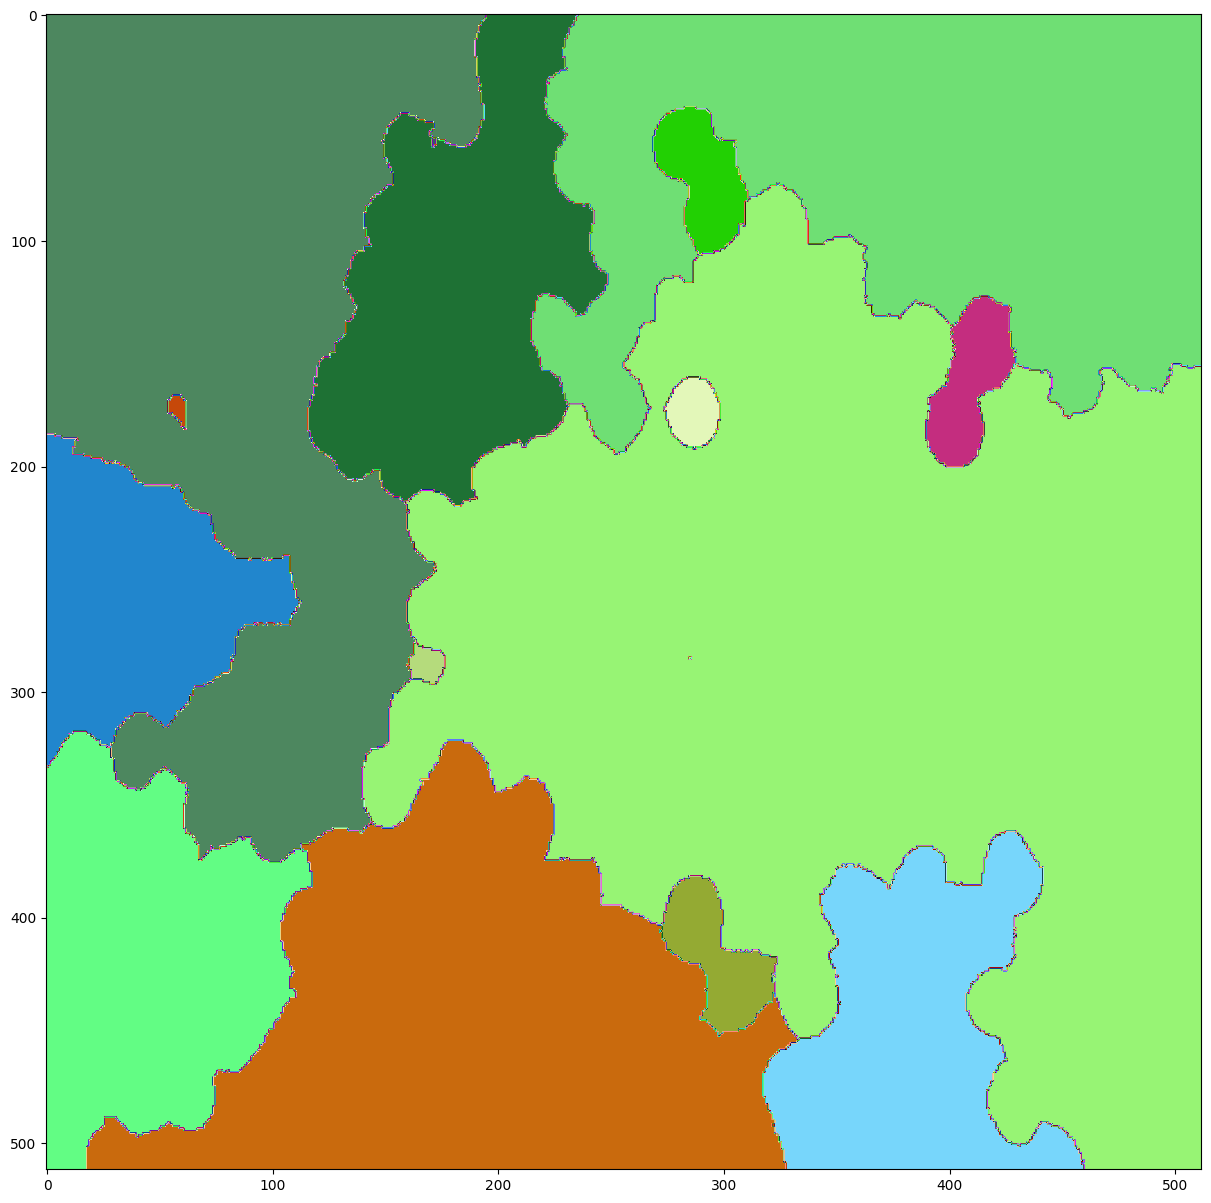

In [33]:
if student :
  wat_closing = seg.watershed(morpho.closing(morpho_grad,morpho.disk(5)),20)
plt.figure(figsize =(15,15))
plt.imshow(wat_closing,cmap =cmaprand)
plt.show()

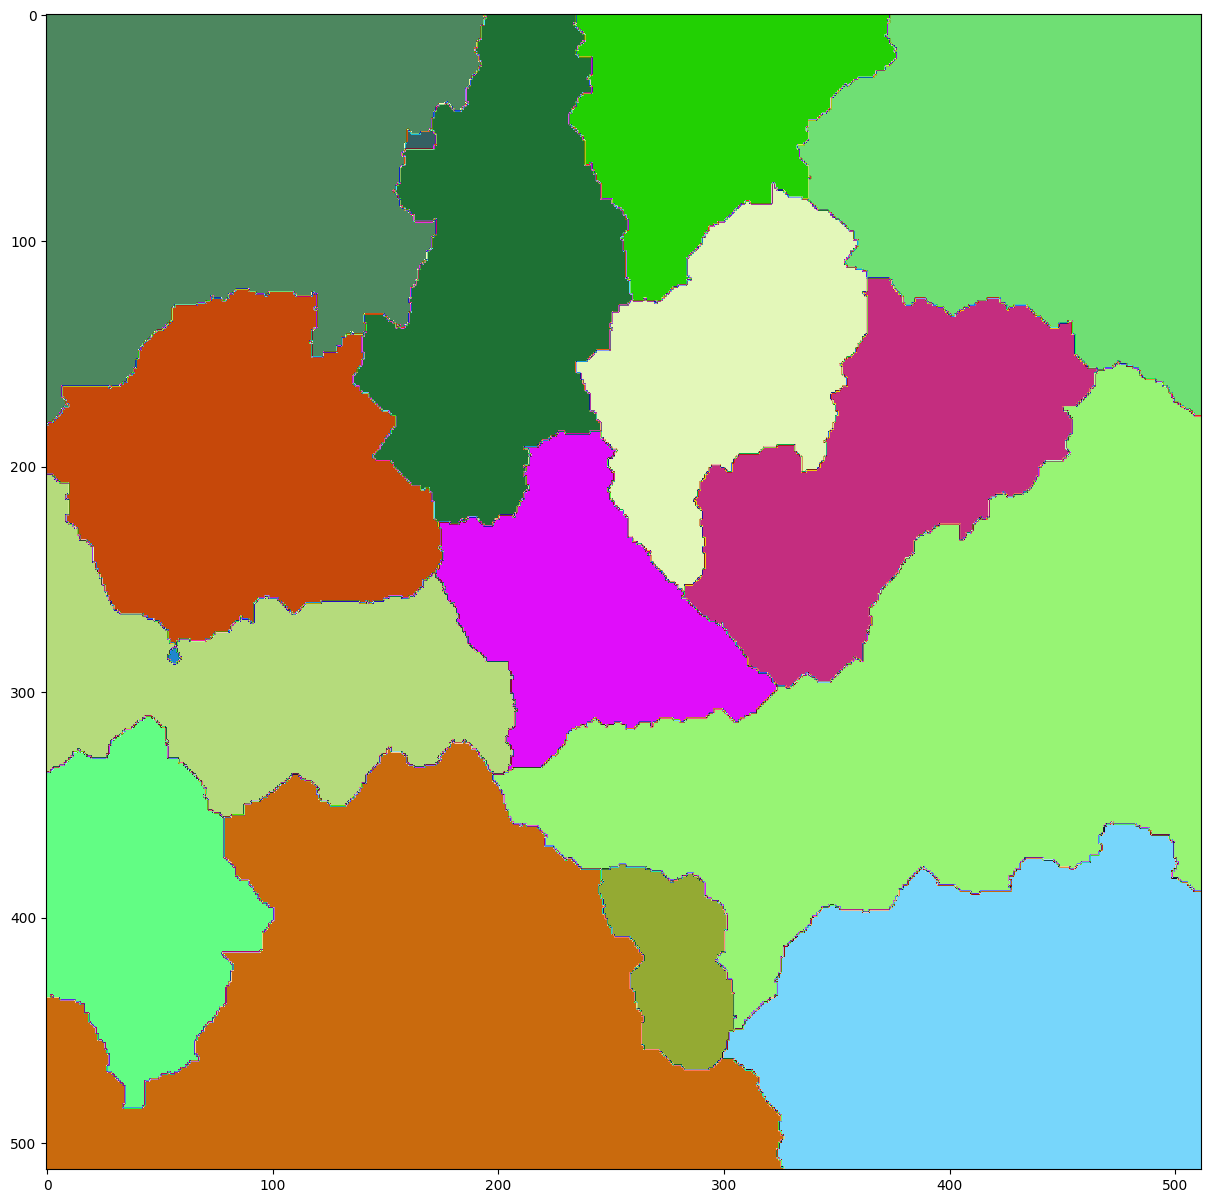

In [34]:
if student :
  wat_opening = seg.watershed(morpho.opening(morpho_grad,morpho.disk(5)),20)
plt.figure(figsize =(15,15))
plt.imshow(wat_opening,cmap =cmaprand)
plt.show()

Your objective is to try to do better than what you did with the closure and opening. To do that, we propose to use specific markers for the watershed transform.

**Q** : In the next cell, compute the reconstruction from an opening of the gradient. You can use as structuring element a disk of size 5. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : Yes, it definitely worked since we can see a good segmentaiton of cells

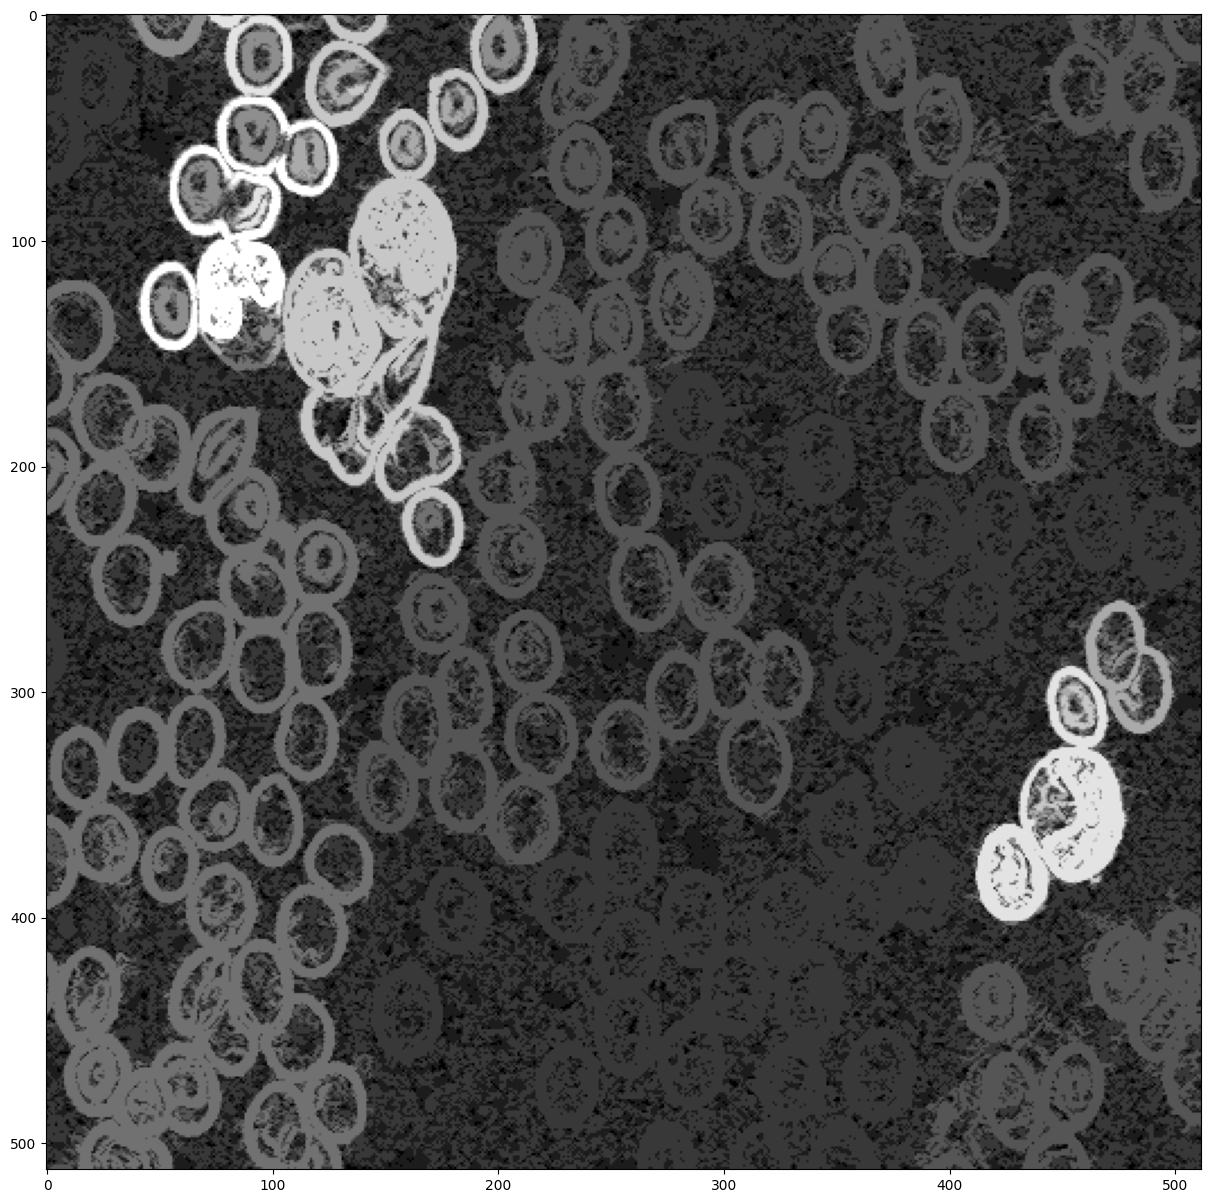

In [21]:
imOpen = morpho.opening(morpho_grad,morpho.disk(5))
reco=morpho.reconstruction(imOpen,morpho_grad)
plt.figure(figsize =(15,15))
plt.imshow(reco,cmap = "gray")
plt.show()

**Q** : In the next cell, compute the reconstruction from an closing of the gradient. You can use as structuring alement a disk of size 5. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : Even though it segmentated succesfully the cells it didn't do it efficiently since the borders are not that good it may be because of the disk radius, the smaller the better in this case

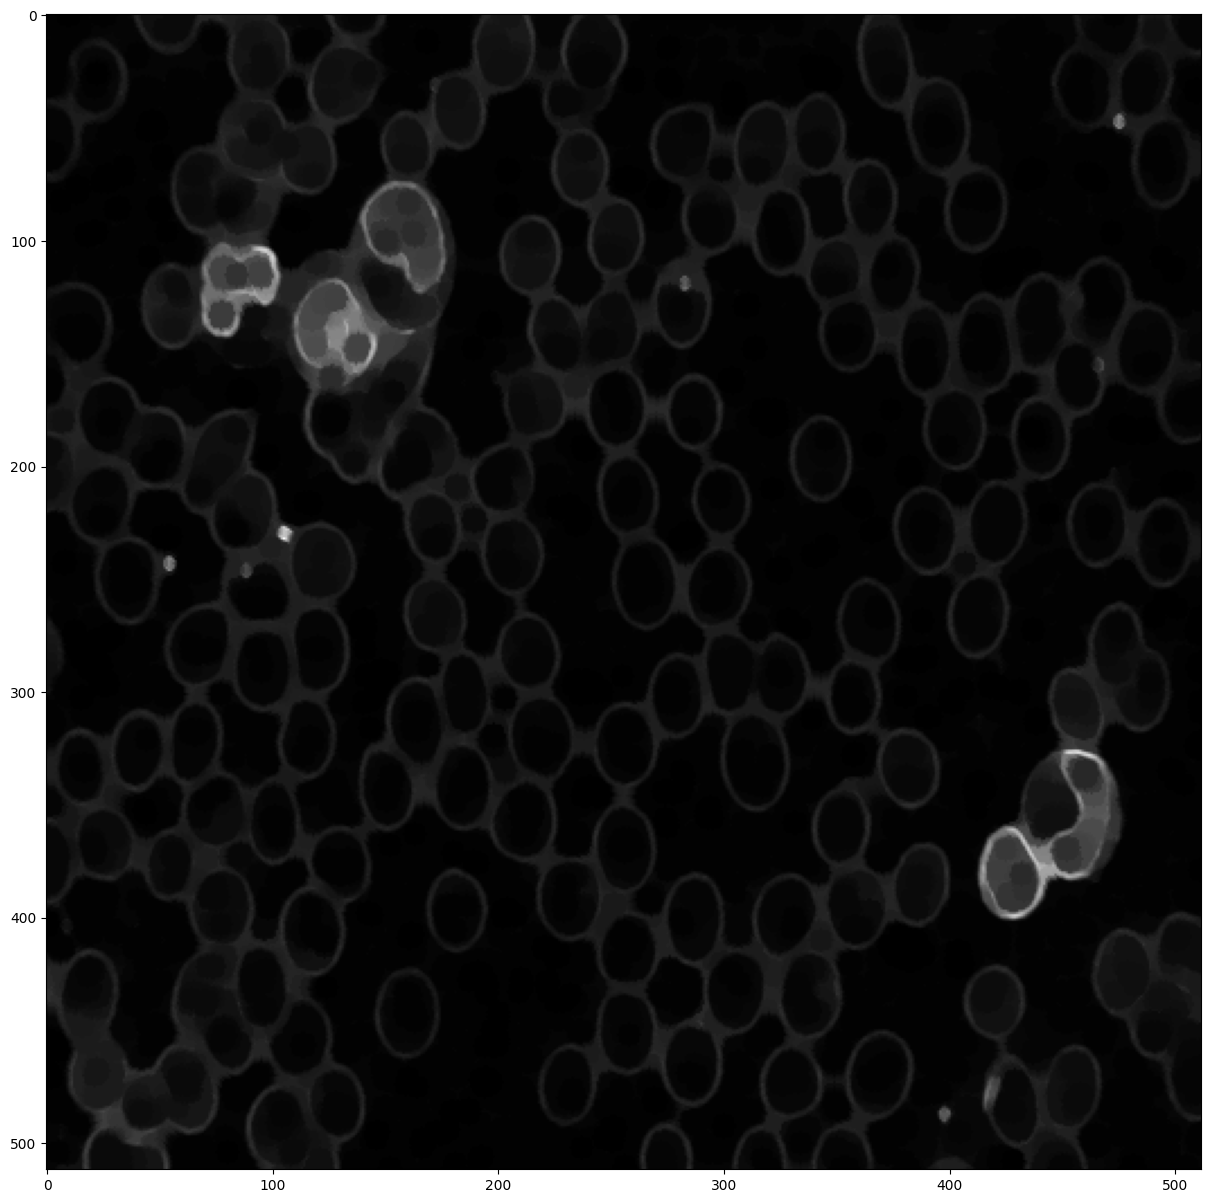

In [38]:
imClos = morpho.closing(morpho_grad,morpho.disk(5))
reco=morpho.reconstruction(morpho_grad,imClos)
plt.figure(figsize =(15,15))
plt.imshow(reco,cmap = "gray")
plt.show()

**Q** : This last part is less guided. Use the reconstruction operation and the above questions to find good markers for the watershed algorithm. You could benefit from using the peak_local_max function of skimage.feature

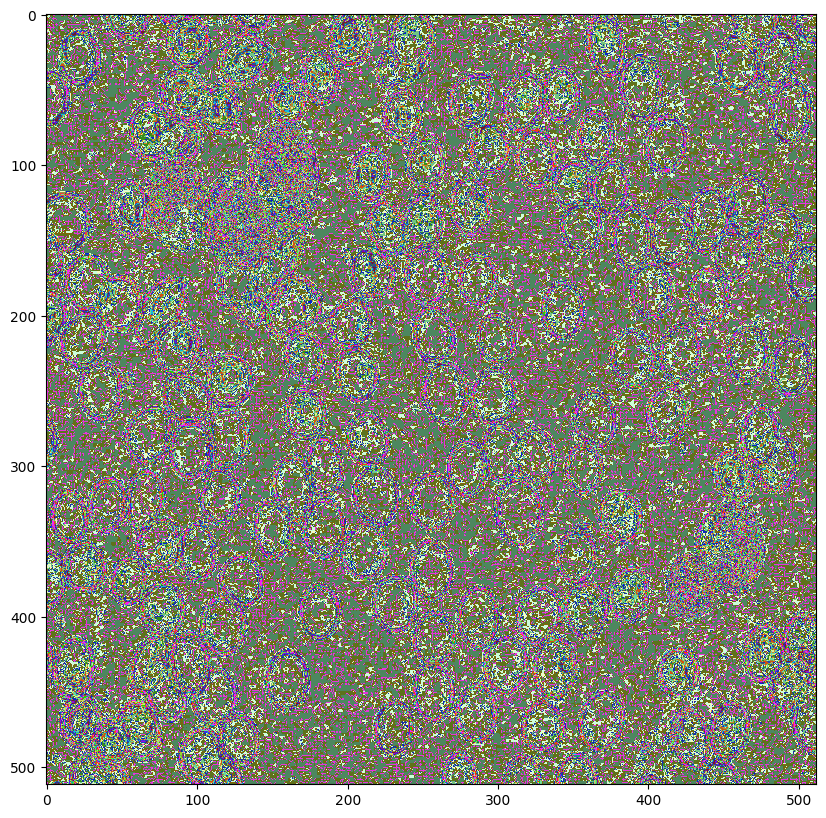

In [75]:
imClos = morpho.closing(morpho_grad, morpho.disk(15))
reco= morpho.reconstruction(morpho_grad, imClos)
wat = seg.watershed(reco,markers=morpho_grad)
plt.figure(figsize =(10,10))
plt.imshow(wat,cmap=cmaprand)
plt.show()